<a href="https://colab.research.google.com/github/juligomez-web/Sys/blob/main/Talle_EJERCICIO_1_1_TransformadaFourier_SAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1.1_ a) — Modelo matemático de la FFT

La **Transformada Discreta de Fourier (DFT)** permite representar una señal discreta
$x[k]$ de longitud $N$ como una suma de exponenciales complejas:

\[
X[n] = \sum_{k=0}^{N-1} x[k] \, e^{-j 2\pi k n / N}, \quad n = 0, 1, \dots, N-1
\]

Cada $X[n]$ indica cuánto contribuye una frecuencia discreta
\( f_n = \frac{n F_s}{N} \) (en Hz) a la construcción de la señal original.  
Así, la DFT convierte una señal en el dominio del tiempo en su representación
en el dominio de la frecuencia.

La **Transformada Rápida de Fourier (FFT)** no cambia el significado de la DFT:
es el mismo cálculo, pero optimizado.  
Mientras la DFT directa requiere $N^2$ operaciones, la FFT reduce
el esfuerzo computacional a \( N \log_2 N \), aprovechando simetrías y recursividad
(algoritmo de *Cooley–Tukey*).

una señal con dos componentes armónicas (50 Hz y 120 Hz)
y se calcula su espectro usando tanto la DFT directa como la FFT, para demostrar
que los resultados son equivalentes (salvo pequeños errores numéricos).


Diferencia máxima |FFT - DFT| = 3.31e-11


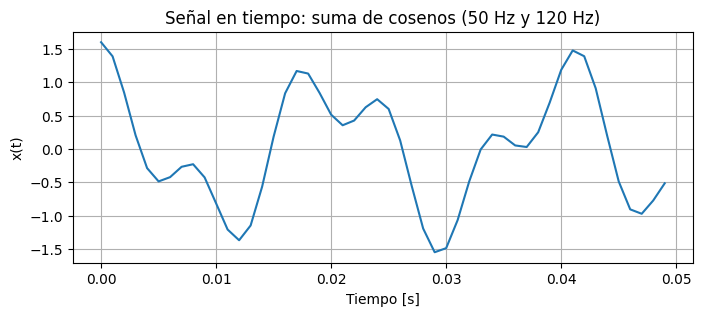

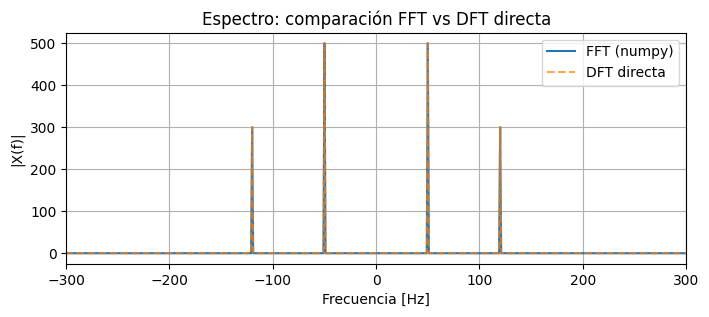

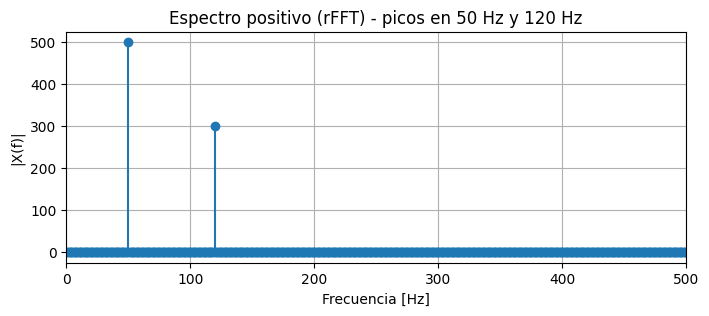

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros de la señal ---
Fs = 1000        # frecuencia de muestreo [Hz]
T = 1.0          # duración [s]
N = int(Fs * T)  # número de muestras
t = np.arange(N) / Fs

# Componentes armónicas
f1, f2 = 50, 120   # frecuencias [Hz]
A1, A2 = 1.0, 0.6  # amplitudes

# Señal: suma de dos cosenos
x = A1*np.cos(2*np.pi*f1*t) + A2*np.cos(2*np.pi*f2*t)

# --- DFT directa (por sumatoria) ---
n = np.arange(N)
k = np.arange(N)
W = np.exp(-1j * 2 * np.pi * np.outer(k, n) / N)
X_dft = x @ W

# --- FFT rápida ---
X_fft = np.fft.fft(x)
freqs = np.fft.fftfreq(N, d=1/Fs)

# Diferencia máxima
print(f"Diferencia máxima |FFT - DFT| = {np.max(np.abs(X_fft - X_dft)):.2e}")

# --- Gráfica 1: señal en el tiempo (primeros 50 ms) ---
plt.figure(figsize=(8,3))
plt.plot(t[:int(0.05*Fs)], x[:int(0.05*Fs)])
plt.title("Señal en tiempo: suma de cosenos (50 Hz y 120 Hz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

# --- Gráfica 2: comparación espectral FFT vs DFT ---
freqs_shift = np.fft.fftshift(freqs)
Xfft_shift = np.fft.fftshift(X_fft)
Xdft_shift = np.fft.fftshift(X_dft)

plt.figure(figsize=(8,3))
plt.plot(freqs_shift, np.abs(Xfft_shift), label="FFT (numpy)")
plt.plot(freqs_shift, np.abs(Xdft_shift), "--", label="DFT directa", alpha=0.7)
plt.xlim(-300, 300)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|X(f)|")
plt.title("Espectro: comparación FFT vs DFT directa")
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfica 3: espectro positivo (rFFT) ---
fr = np.fft.rfftfreq(N, d=1/Fs)
Xr = np.fft.rfft(x)

plt.figure(figsize=(8,3))
plt.stem(fr, np.abs(Xr), basefmt=" ")
plt.xlim(0, 500)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|X(f)|")
plt.title("Espectro positivo (rFFT) - picos en 50 Hz y 120 Hz")
plt.grid(True)
plt.show()

# Ejercicio 1.1_B) — Comparación de tiempos: DFT (sumatoria) vs FFT

Objetivo: comparar el tiempo de cómputo entre la DFT calculada por la definición (sumatoria)
y la FFT (algoritmo rápido) para distintas longitudes de señal.  
Se medirán los tiempos para longitudes:

`[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]`

Procedimiento:
1. Para cada N, se genera una señal aleatoria de longitud N.
2. Se calcula la DFT por la definición usando una multiplicación matricial (vectorizada),
   que realiza el mismo trabajo matemático de la sumatoria pero aprovechando BLAS.
3. Se calcula la FFT con `np.fft.fft`.
4. Cada medición se repite `repeats=3` (por defecto) y se toma la media para mayor robustez.
5. Se grafica tiempo promedio vs N en escala **log-log** y se ajustan curvas teóricas \(c_1 N^2\) y \(c_2 N \log_2 N\)
   para mostrar la diferencia de orden de complejidad.



Corriendo pruebas (puede tardar unos segundos a minutos dependiendo del entorno)...
N=   4  DFT_direct=0.0000s  FFT=0.0000s
N=   8  DFT_direct=0.0000s  FFT=0.0000s
N=  16  DFT_direct=0.0001s  FFT=0.0000s
N=  32  DFT_direct=0.0001s  FFT=0.0000s
N=  64  DFT_direct=0.0004s  FFT=0.0000s
N= 128  DFT_direct=0.0013s  FFT=0.0000s
N= 256  DFT_direct=0.0052s  FFT=0.0000s
N= 512  DFT_direct=0.0223s  FFT=0.0000s
N=1024  DFT_direct=0.0978s  FFT=0.0000s
N=2048  DFT_direct=0.4220s  FFT=0.0001s
N=4096  DFT_direct=3.1375s  FFT=0.0001s


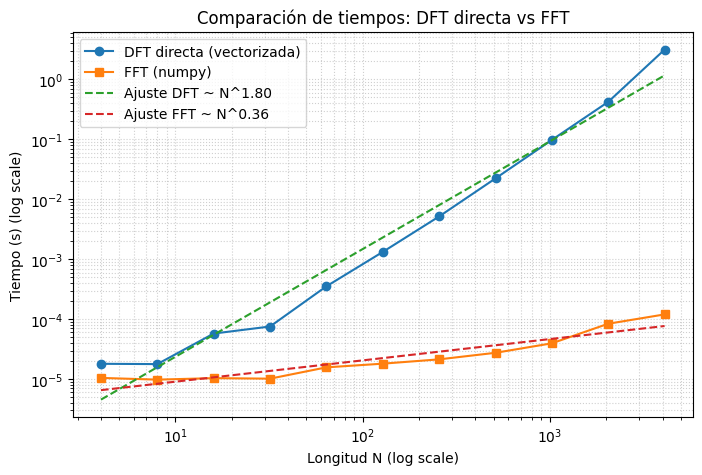


Resumen de tiempos (promedios):
N=   4  DFT=0.000018s  FFT=0.000010s  ratio DFT/FFT=1.72
N=   8  DFT=0.000018s  FFT=0.000010s  ratio DFT/FFT=1.82
N=  16  DFT=0.000058s  FFT=0.000010s  ratio DFT/FFT=5.55
N=  32  DFT=0.000075s  FFT=0.000010s  ratio DFT/FFT=7.42
N=  64  DFT=0.000353s  FFT=0.000016s  ratio DFT/FFT=22.48
N= 128  DFT=0.001324s  FFT=0.000018s  ratio DFT/FFT=73.12
N= 256  DFT=0.005173s  FFT=0.000021s  ratio DFT/FFT=242.02
N= 512  DFT=0.022302s  FFT=0.000027s  ratio DFT/FFT=811.25
N=1024  DFT=0.097760s  FFT=0.000040s  ratio DFT/FFT=2469.97
N=2048  DFT=0.421985s  FFT=0.000084s  ratio DFT/FFT=5027.00
N=4096  DFT=3.137514s  FFT=0.000120s  ratio DFT/FFT=26129.40


In [ ]:
# Ejercicio 2: comparar tiempos DFT por definición vs FFT
import numpy as np
import time
import matplotlib.pyplot as plt

# Parámetros de la prueba
Ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
repeats = 3  # número de repeticiones por N para promediar
rng = np.random.default_rng(42)

def dft_direct_vectorized(x):
    """DFT por definición usando matriz de factores (vectorizado)."""
    N = x.size
    k = np.arange(N)
    n = np.arange(N)
    W = np.exp(-1j * 2 * np.pi * np.outer(k, n) / N)  # matriz N x N
    return x @ W  # producto 1xN * NxN -> 1xN

def time_function(func, *args, repeats=3):
    """Mide tiempo promedio de ejecución de func(*args) en segundos."""
    times = []
    # un 'warm-up' ligero
    for _ in range(1):
        func(*args)
    for _ in range(repeats):
        t0 = time.perf_counter()
        func(*args)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return float(np.mean(times)), float(np.std(times))

# Arrays para almacenar resultados
times_dft = []
stds_dft = []
times_fft = []
stds_fft = []

print("Corriendo pruebas (puede tardar unos segundos a minutos dependiendo del entorno)...")
for N in Ns:
    # señal aleatoria (real) de longitud N
    x = rng.standard_normal(N)
    # medir DFT vectorizada
    td_mean, td_std = time_function(dft_direct_vectorized, x, repeats=repeats)
    # medir FFT (numpy)
    tf_mean, tf_std = time_function(np.fft.fft, x, repeats=repeats)
    times_dft.append(td_mean)
    stds_dft.append(td_std)
    times_fft.append(tf_mean)
    stds_fft.append(tf_std)
    print(f"N={N:4d}  DFT_direct={td_mean:.4f}s  FFT={tf_mean:.4f}s")

# Conversión a arrays
Ns_arr = np.array(Ns)
times_dft = np.array(times_dft)
times_fft = np.array(times_fft)

# Ajustes teóricos en escala log-log (estimación de constantes)
# Ajustar log(t) = a + b*log(N) -> t ~ exp(a) * N^b
coeffs_dft = np.polyfit(np.log(Ns_arr), np.log(times_dft + 1e-30), 1)  # evitar log(0)
coeffs_fft = np.polyfit(np.log(Ns_arr), np.log(times_fft + 1e-30), 1)

exp_dft = coeffs_dft[0]
exp_fft = coeffs_fft[0]
const_dft = np.exp(coeffs_dft[1])
const_fft = np.exp(coeffs_fft[1])

# Curvas ajustadas para graficar
Ns_smooth = np.linspace(Ns_arr.min(), Ns_arr.max(), 200)
fit_dft = const_dft * Ns_smooth**(exp_dft)
fit_fft = const_fft * Ns_smooth**(exp_fft)

# Graficar (una sola figura)
plt.figure(figsize=(8,5))
plt.loglog(Ns_arr, times_dft, 'o-', label='DFT directa (vectorizada)')
plt.loglog(Ns_arr, times_fft, 's-', label='FFT (numpy)')
plt.loglog(Ns_smooth, fit_dft, '--', label=f'Ajuste DFT ~ N^{exp_dft:.2f}')
plt.loglog(Ns_smooth, fit_fft, '--', label=f'Ajuste FFT ~ N^{exp_fft:.2f}')
plt.xlabel('Longitud N (log scale)')
plt.ylabel('Tiempo (s) (log scale)')
plt.title('Comparación de tiempos: DFT directa vs FFT')
plt.grid(which='both', ls=':', alpha=0.6)
plt.legend()
plt.show()

# Impresión resumen numérico
print("\nResumen de tiempos (promedios):")
for Ni, td, tf in zip(Ns, times_dft, times_fft):
    print(f"N={Ni:4d}  DFT={td:.6f}s  FFT={tf:.6f}s  ratio DFT/FFT={td/ (tf+1e-30):.2f}")

# Guardar resultados en caso que quieras reutilizarlos
results = {
    "Ns": Ns_arr,
    "times_dft": times_dft,
    "times_fft": times_fft,
    "fit_params": {
        "dft": {"exp": float(exp_dft), "const": float(const_dft)},
        "fft": {"exp": float(exp_fft), "const": float(const_fft)}
    }
}


# Ejercicio 1.1_C) — Frecuencia de -3 dB y frecuencias de corte

La **frecuencia de –3 dB** es un concepto clave en análisis de filtros y espectros de señales.  
Se define como la frecuencia en la que la **potencia** de la señal cae a la mitad de su valor máximo.

Recordemos que la potencia es proporcional al **cuadrado de la amplitud**, por lo tanto:

\[
\frac{P}{P_{\text{max}}} = \frac{1}{2}
\Rightarrow 20 \log_{10}\!\left(\frac{A}{A_{\text{max}}}\right) = -3.01\text{ dB}
\]

Por eso se dice que “–3 dB” corresponde a una atenuación de la **mitad de potencia** o de un **factor 0.707 en amplitud**.

---

### 🔹 Frecuencia de corte
En el diseño de filtros (pasa bajas, pasa altas, pasa banda o rechaza banda),  
la **frecuencia de corte** \( f_c \) se define justamente como aquella donde la ganancia del filtro cae **3 dB** respecto al máximo.  
Es decir, el punto donde el filtro empieza a atenuar la señal de forma significativa.

Por ejemplo:
- En un **filtro pasa bajas**, \( f_c \) marca el límite entre el paso (sin atenuación) y la zona donde las frecuencias empiezan a disminuir.  
- En un **filtro pasa altas**, ocurre lo contrario: debajo de \( f_c \) la señal se atenúa, y por encima se mantiene.  

simulación con una señal compuesta por dos tonos (100 Hz y 1000 Hz), a la que se le aplica un filtro pasa bajas simple con frecuencia de corte de 300 Hz.


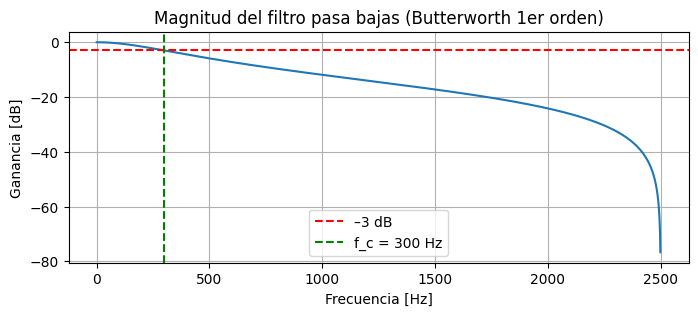

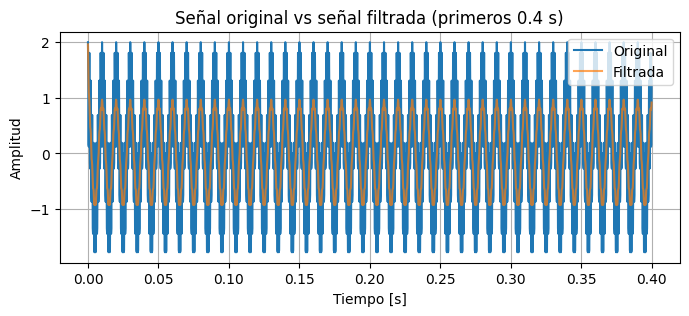

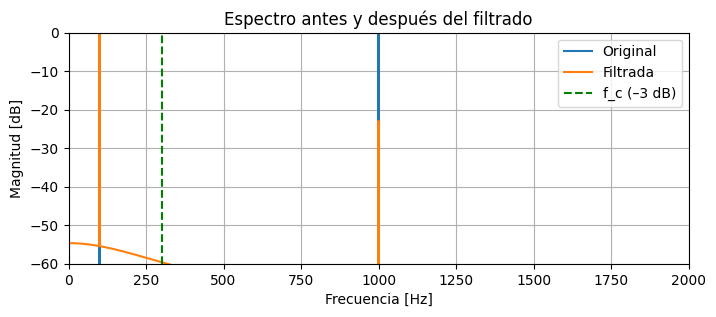

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, filtfilt

# Parámetros de simulación
Fs = 5000       # frecuencia de muestreo [Hz]
T = 1           # duración [s]
t = np.arange(0, T, 1/Fs)

# Señal con dos tonos
f1, f2 = 100, 1000
x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)

# Diseño de filtro pasa bajas Butterworth de 1er orden
fc = 300  # frecuencia de corte [Hz]
b, a = butter(N=1, Wn=fc/(Fs/2), btype='low')

# Respuesta en frecuencia del filtro
w, h = freqz(b, a, worN=2048)
freqs = w * Fs / (2*np.pi)
gain_db = 20*np.log10(abs(h))

# Aplicar el filtro
y = filtfilt(b, a, x)

# --- Gráfica 1: Respuesta en frecuencia del filtro ---
plt.figure(figsize=(8,3))
plt.plot(freqs, gain_db)
plt.axhline(-3, color='r', linestyle='--', label='–3 dB')
plt.axvline(fc, color='g', linestyle='--', label=f'f_c = {fc} Hz')
plt.title("Magnitud del filtro pasa bajas (Butterworth 1er orden)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Ganancia [dB]")
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfica 2: Señal original y filtrada ---
plt.figure(figsize=(8,3))
plt.plot(t[:2000], x[:2000], label="Original")
plt.plot(t[:2000], y[:2000], label="Filtrada", alpha=0.7)
plt.title("Señal original vs señal filtrada (primeros 0.4 s)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfica 3: Espectros (FFT) ---
def spectrum(sig, Fs):
    N = len(sig)
    X = np.fft.rfft(sig)
    f = np.fft.rfftfreq(N, 1/Fs)
    return f, np.abs(X)/np.max(np.abs(X))

f_x, mag_x = spectrum(x, Fs)
f_y, mag_y = spectrum(y, Fs)

plt.figure(figsize=(8,3))
plt.plot(f_x, 20*np.log10(mag_x), label="Original")
plt.plot(f_y, 20*np.log10(mag_y), label="Filtrada")
plt.axvline(fc, color='g', linestyle='--', label="f_c (–3 dB)")
plt.xlim(0, 2000)
plt.ylim(-60, 0)
plt.title("Espectro antes y después del filtrado")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid(True)
plt.show()


# Ejercicio 1.1_D) — Filtrado espectral con FFT / iFFT sobre 5 s de audio

Objetivo: aplicar 4 filtros (pasa-bajas, pasa-altas, pasa-banda y rechaza-banda) usando la FFT y la iFFT
sobre un fragmento de **5 segundos** de una canción.

Instrucciones de uso:
1. Preferible: sube un archivo WAV con el que trabajaremos (arrastrar y soltar en la celda de archivos).  
2. Alternativa: define la variable `link` con el enlace de YouTube de la canción y (si es necesario) sube un archivo de cookies del navegador exportado (`youtube.com_cookies.txt`) para poder descargar.  
3. El código:
   - lee el audio (soporta mono y estéreo),
   - toma 5 s a partir de `start_sec` (ajustable),
   - aplica una ventana (Hann) para reducir leakage,
   - crea máscaras en frecuencia para cada tipo de filtro (ideal o suavizada),
   - calcula la iFFT para reconstruir la señal filtrada,
   - guarda cada salida en WAV y permite reproducir el fragmento en Colab.
4. Parámetros modificables: `start_sec`, `duration_sec`, `fc_lp`, `fc_hp`, `bp_low`, `bp_high`, `bs_low`, `bs_high`.


Instalando yt-dlp...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Descargando audio desde YouTube...
Convirtiendo a WAV...
Audio leído: audio_yt.wav, fs=48000 Hz, canales=2
Fragmento: 5.00s (0:240000)


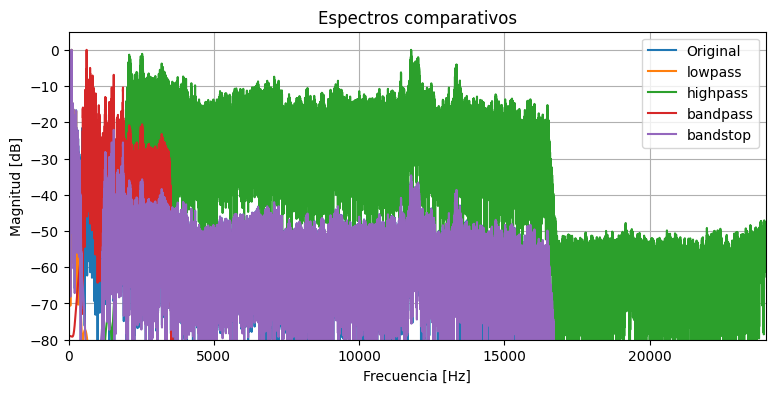

▶ lowpass


▶ highpass


▶ bandpass


▶ bandstop


Listo. Archivos guardados como filtered_*.wav


In [ ]:
# === Ejercicio D – Filtrado espectral por FFT/iFFT ===

# ✅ CONFIGURACIÓN INICIAL ===========================================
link = "https://www.youtube.com/watch?v=-vdUTG0iSck&list=PLq7Mvbpi6dNPdvCp2B1__cc5wqg8HibhI"

start_sec = 0        # inicio del fragmento (s)
duration_sec = 5     # duración (s)

# Frecuencias de corte (Hz)
fc_lp = 300          # pasa-bajas
fc_hp = 2000         # pasa-altas
bp_low, bp_high = 500, 3500    # pasa-banda
bs_low, bs_high = 400, 1200    # rechaza-banda

smooth_mask = True
transition_width = 100
out_prefix = "filtered_"

# ================================================================

import os, shutil, numpy as np, soundfile as sf, matplotlib.pyplot as plt
from IPython.display import Audio, display

# ---- Descarga y conversión desde YouTube ----
try:
    import yt_dlp
except ImportError:
    print("Instalando yt-dlp...")
    !python3 -m pip install -q https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

def download_audio(link):
    mp3_name = "audio_yt.mp3"
    wav_name = "audio_yt.wav"
    print("Descargando audio desde YouTube...")
    os.system(f'yt-dlp --extract-audio --audio-format mp3 -o "{mp3_name}" "{link}" -q')
    print("Convirtiendo a WAV...")
    os.system(f'ffmpeg -y -i "{mp3_name}" "{wav_name}" -loglevel error')
    return wav_name

wav_file = download_audio(link)

# ---- Lectura del audio ----
x, fs = sf.read(wav_file)
if x.ndim == 1: x = x[:,None]
print(f"Audio leído: {wav_file}, fs={fs} Hz, canales={x.shape[1]}")

# ---- Selección de fragmento ----
start_idx = int(start_sec*fs)
end_idx   = start_idx + int(duration_sec*fs)
seg = x[start_idx:end_idx,:]
t = np.arange(seg.shape[0])/fs + start_sec
print(f"Fragmento: {seg.shape[0]/fs:.2f}s ({start_idx}:{end_idx})")

# ---- Ventana y FFT ----
win = np.hanning(seg.shape[0])[:,None]
segw = seg * win
N = segw.shape[0]
freqs = np.fft.rfftfreq(N,1/fs)

def mask(freqs, type_, f1, f2=None, smooth=True, tw=100):
    H = np.zeros_like(freqs)
    if type_=="low":  H[freqs<=f1]=1
    if type_=="high": H[freqs>=f1]=1
    if type_=="bandpass": H[(freqs>=f1)&(freqs<=f2)]=1
    if type_=="bandstop": H[:] = 1; H[(freqs>=f1)&(freqs<=f2)] = 0
    if smooth and tw>0:
        def smooth_edge(H,freqs,f0,w,up):
            idx=(freqs>f0-w/2)&(freqs<f0+w/2)
            u=(freqs[idx]-f0+w/2)/w
            ramp=0.5*(1-np.cos(np.pi*u))
            H[idx]=ramp if up else (1-ramp)
            return H
        if type_=="low":  H=smooth_edge(H,freqs,f1,tw,up=False)
        if type_=="high": H=smooth_edge(H,freqs,f1,tw,up=True)
        if type_=="bandpass":
            H=smooth_edge(H,freqs,f1,tw,up=True)
            H=smooth_edge(H,freqs,f2,tw,up=False)
        if type_=="bandstop":
            H=smooth_edge(H,freqs,bs_low,tw,up=False)
            H=smooth_edge(H,freqs,bs_high,tw,up=True)
    return H

masks = {
    "lowpass" : mask(freqs,"low",fc_lp,smooth=smooth_mask,tw=transition_width),
    "highpass": mask(freqs,"high",fc_hp,smooth=smooth_mask,tw=transition_width),
    "bandpass": mask(freqs,"bandpass",bp_low,bp_high,smooth=smooth_mask,tw=transition_width),
    "bandstop": mask(freqs,"bandstop",bs_low,bs_high,smooth=smooth_mask,tw=transition_width)
}

# ---- Aplicar máscaras y reconstruir ----
def filt(segch,H):
    X=np.fft.rfft(segch)
    Xf=X*H
    y=np.fft.irfft(Xf,n=N)
    win_safe=win[:,0].copy(); win_safe[win_safe<1e-6]=1e-6
    return y/win_safe

results={}
for name,H in masks.items():
    Y=[filt(segw[:,ch],H) for ch in range(segw.shape[1])]
    y=np.stack(Y,axis=1)
    y/=np.max(np.abs(y)+1e-12)*0.95
    results[name]=y
    sf.write(f"{out_prefix}{name}.wav",y,fs)

# ---- Graficar espectros ----
def plot_spec(sig,label):
    f=np.fft.rfftfreq(len(sig),1/fs)
    X=np.fft.rfft(sig)
    plt.plot(f,20*np.log10(np.abs(X)/np.max(np.abs(X))),label=label)
plt.figure(figsize=(9,4))
plot_spec(seg[:,0],"Original")
for n,y in results.items(): plot_spec(y[:,0],n)
plt.xlim(0,fs/2); plt.ylim(-80,5)
plt.xlabel("Frecuencia [Hz]"); plt.ylabel("Magnitud [dB]"); plt.title("Espectros comparativos")
plt.legend(); plt.grid(True); plt.show()

# ---- Reproducir ----
display(Audio(seg[:,0],rate=fs))
for n,y in results.items():
    print(f"▶ {n}")
    display(Audio(y[:,0],rate=fs))
print("Listo. Archivos guardados como filtered_*.wav")


 # Ejercicio 1_1_E) – Detector de género musical (KNN)

**Objetivo**
- Distinguir entre **Reguetón** y **Salsa** usando la magnitud del espectro (FFT) de clips de 5 s.  
- Entrenar un **KNN** (distancia euclídea) y probar con una canción nueva.



In [5]:
!pip install -q yt-dlp librosa soundfile scikit-learn tqdm
!apt install -y ffmpeg

import os, numpy as np, soundfile as sf, librosa
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# Parámetros generales
TARGET_FS = 22050
DURATION  = 5.0
NFFT      = 4096
DATA_DIR  = "/content/dataset"
os.makedirs(DATA_DIR, exist_ok=True)

def load_wav_and_prepare(path, dur=DURATION, fs_target=TARGET_FS):
    """Carga, convierte a mono, re-muestrea y recorta a 5 s."""
    x, fs = sf.read(path)
    if x.ndim > 1:
        x = np.mean(x, axis=1)
    if fs != fs_target:
        x = librosa.resample(x, orig_sr=fs, target_sr=fs_target)
    n = int(dur * fs_target)
    if len(x) < n:
        return None
    return x[:n], fs_target

def fft_magnitude(x, nfft=NFFT):
    """Magnitud del espectro FFT normalizada, evita división por 0."""
    X = np.fft.rfft(x * np.hanning(len(x)), n=nfft)
    m = np.abs(X)
    max_val = np.max(m)
    if max_val == 0:
        return np.zeros_like(m)
    return m / max_val

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [6]:
# ==========================================
# 📂 ENLACES DEL DATASET
#   🔸 Pega aquí tus videos de YouTube
# ==========================================

dataset_links = [
    # ---------- 🎵 REGUETÓN ----------
    ("https://www.youtube.com/watch?v=0hfW3qSeYSU", "regueton"),
    ("https://www.youtube.com/watch?v=JPYtPUfV9BU", "regueton"),
    ("https://www.youtube.com/watch?v=PfeY71rsaMg", "regueton"),
    ("https://www.youtube.com/watch?v=qdi5rOyvvu0", "regueton"),
    ("https://www.youtube.com/watch?v=VcrKS3nRvF8", "regueton"),
    ("https://www.youtube.com/watch?v=Gaxl1Erj-Wk", "regueton"),
    ("https://www.youtube.com/watch?v=igTlq-InJao", "regueton"),
    ("https://www.youtube.com/watch?v=fertWRzDRR0", "regueton"),
    ("https://www.youtube.com/watch?v=h3WFI_NIZ2o", "regueton"),
    ("https://www.youtube.com/watch?v=oTZh02ubIpc", "regueton"),
    ("https://www.youtube.com/watch?v=4p5aSV-SePk", "regueton"),
    ("https://www.youtube.com/watch?v=v4OA5DjtZQk", "regueton"),
    ("https://www.youtube.com/watch?v=xMoVMmsQhG0", "regueton"),
    ("https://www.youtube.com/watch?v=tZ8yQXiMcLo", "regueton"),
    ("https://www.youtube.com/watch?v=UMVIvGZrv9k", "regueton"),
    ("https://www.youtube.com/watch?v=7wKVc8fo3rw", "regueton"),
    ("https://www.youtube.com/watch?v=9zLWwGQf7v8", "regueton"),
    ("https://www.youtube.com/watch?v=Z4RcrMRMuEM", "regueton"),
    ("https://www.youtube.com/watch?v=U6Sx-G3tyRQ", "regueton"),
    ("https://www.youtube.com/watch?v=JJsQLgoqPUk", "regueton"),
    ("https://www.youtube.com/watch?v=-vdUTG0iSck", "regueton"),
    ("https://www.youtube.com/watch?v=e9NRG8NDyMk", "regueton"),
    ("https://www.youtube.com/watch?v=51AfjK-ktVc", "regueton"),
    ("https://www.youtube.com/watch?v=b5lTYJF4ZhE", "regueton"),
    ("https://www.youtube.com/watch?v=Sha83dAbjZY", "regueton"),

    # ---------- 🎶 SALSA ----------
    ("https://www.youtube.com/watch?v=RUV55lGPGaY", "salsa"),
    ("https://www.youtube.com/watch?v=FNjXnRJROtQ", "salsa"),
    ("https://www.youtube.com/watch?v=3kdDoyYn36A", "salsa"),
    ("https://www.youtube.com/watch?v=7GYVJgflHK4", "salsa"),
    ("https://www.youtube.com/watch?v=-3zLExHrj3A", "salsa"),
    ("https://www.youtube.com/watch?v=XVUCXQPbb1c", "salsa"),
    ("https://www.youtube.com/watch?v=qyGx4rxoeSg", "salsa"),
    ("https://www.youtube.com/watch?v=Mq3LwKa_lYg", "salsa"),
    ("https://www.youtube.com/watch?v=fEhnwoVjrgc", "salsa"),
    ("https://www.youtube.com/watch?v=83a7wpjhZ3c", "salsa"),
    ("https://www.youtube.com/watch?v=DF5avtpj_5U", "salsa"),
    ("https://www.youtube.com/watch?v=AuYZJ9f5L48", "salsa"),
    ("https://www.youtube.com/watch?v=L-AushSSq2I", "salsa"),
    ("https://www.youtube.com/watch?v=ntW-kNQo090", "salsa"),
    ("https://www.youtube.com/watch?v=Lg13W7_H3d8", "salsa"),
    ("https://www.youtube.com/watch?v=pry-ZU6StYk", "salsa"),
    ("https://www.youtube.com/watch?v=8RhFosXuSxA", "salsa"),
    ("https://www.youtube.com/watch?v=g8fdI9UT45U", "salsa"),
    ("https://www.youtube.com/watch?v=4wLLRv5XWDc", "salsa"),
    ("https://www.youtube.com/watch?v=ExCIp6TOnJw", "salsa"),
    ("https://www.youtube.com/watch?v=Zc13NAc7dvM", "salsa"),
    ("https://www.youtube.com/watch?v=KIC4fVmzUwI", "salsa"),
    ("https://www.youtube.com/watch?v=_3bsI9AK8Ak", "salsa"),
    ("https://www.youtube.com/watch?v=OC7AQ9HqmMI", "salsa"),
    ("https://www.youtube.com/watch?v=NhJqlpQfkh0", "salsa"),
]


In [7]:
X_list, y_list = [], []

print(f"🔄 Descargando {len(dataset_links)} clips de YouTube...\n")
for i, (link, label) in enumerate(dataset_links):
    out_wav = os.path.join(DATA_DIR, f"{label}_{i:03d}.wav")
    print(f"[{i+1}/{len(dataset_links)}] → {label}")
    os.system(f'yt-dlp --quiet --no-warnings --extract-audio --audio-format wav -o "{out_wav}" "{link}"')

    if not os.path.exists(out_wav):
        print("⚠️ No se descargó:", link)
        continue
    seg, fs = load_wav_and_prepare(out_wav)
    if seg is None:
        print("⚠️ Clip muy corto, se omite:", link)
        continue
    feat = fft_magnitude(seg)
    X_list.append(feat)
    y_list.append(label)

X = np.array(X_list)
y = np.array(y_list)
print("\n✅ Dataset listo:", X.shape)

# --- Limpieza de posibles NaN ---
mask = ~np.isnan(X).any(axis=1)
X = X[mask]
y = y[mask]
print("🧹 Dataset limpio (sin NaN):", X.shape)

# --- Entrenamiento ---
K = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
knn = KNeighborsClassifier(n_neighbors=K, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("\n=== RESULTADOS ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


🔄 Descargando 50 clips de YouTube...

[1/50] → regueton
[2/50] → regueton
[3/50] → regueton
[4/50] → regueton
[5/50] → regueton
[6/50] → regueton
[7/50] → regueton
[8/50] → regueton
[9/50] → regueton
[10/50] → regueton
[11/50] → regueton
[12/50] → regueton
[13/50] → regueton
[14/50] → regueton
[15/50] → regueton
[16/50] → regueton
[17/50] → regueton
[18/50] → regueton
[19/50] → regueton
[20/50] → regueton
[21/50] → regueton
[22/50] → regueton
[23/50] → regueton
[24/50] → regueton
[25/50] → regueton
[26/50] → salsa
[27/50] → salsa
[28/50] → salsa
[29/50] → salsa
[30/50] → salsa
[31/50] → salsa
[32/50] → salsa
[33/50] → salsa
[34/50] → salsa
[35/50] → salsa
[36/50] → salsa
[37/50] → salsa
[38/50] → salsa
[39/50] → salsa
[40/50] → salsa
[41/50] → salsa
[42/50] → salsa
[43/50] → salsa
[44/50] → salsa
[45/50] → salsa
[46/50] → salsa
[47/50] → salsa
[48/50] → salsa
[49/50] → salsa
[50/50] → salsa

✅ Dataset listo: (50, 2049)
🧹 Dataset limpio (sin NaN): (50, 2049)

=== RESULTADOS ===
Accuracy

In [8]:
def predict_genre_from_link(link, knn):
    tmp_wav = "/content/new_clip.wav"
    os.system(f'yt-dlp --quiet --no-warnings --extract-audio --audio-format wav -o "{tmp_wav}" "{link}"')
    x, fs = sf.read(tmp_wav)
    if x.ndim > 1:
        x = np.mean(x, axis=1)
    x = librosa.resample(x, orig_sr=fs, target_sr=TARGET_FS)
    x = x[:int(DURATION * TARGET_FS)]
    feat = fft_magnitude(x).reshape(1, -1)
    return knn.predict(feat)[0]

# 🎧 Canción de prueba
link_prueba = "https://www.youtube.com/watch?v=0hfW3qSeYSU"
pred = predict_genre_from_link(link_prueba, knn)
print("🎵 El género detectado para la canción de prueba es:", pred)


🎵 El género detectado para la canción de prueba es: regueton


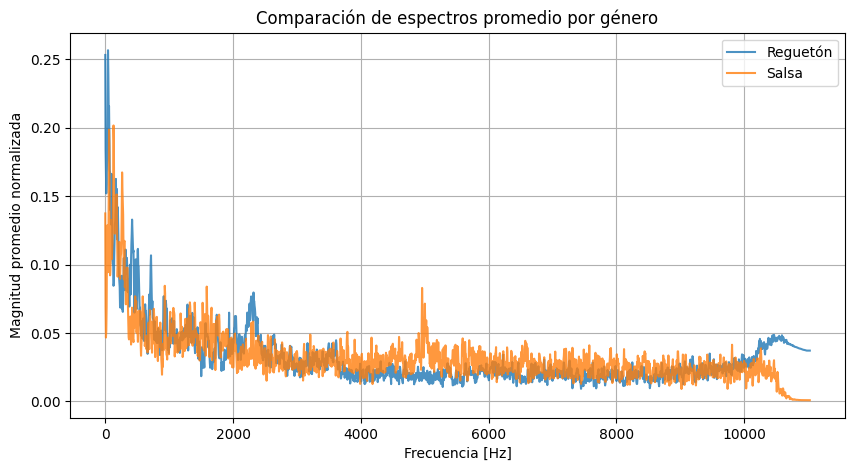

In [9]:
# Promedios por género
reg_idx = [i for i, g in enumerate(y) if g == "regueton"]
sal_idx = [i for i, g in enumerate(y) if g == "salsa"]

mean_reg = np.mean(X[reg_idx], axis=0)
mean_sal = np.mean(X[sal_idx], axis=0)
freqs = np.fft.rfftfreq(NFFT, d=1/TARGET_FS)

plt.figure(figsize=(10,5))
plt.plot(freqs, mean_reg, label="Reguetón", alpha=0.8)
plt.plot(freqs, mean_sal, label="Salsa", alpha=0.8)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud promedio normalizada")
plt.title("Comparación de espectros promedio por género")
plt.legend(); plt.grid(True); plt.show()
